## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Oct 15 06:53:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **06.10.2024** with version **YOLOv8.3.5**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible.




In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NOjYNOO5bh9qZyQeD2uc")
project = rf.workspace("image-processing-project-wtrq6").project("logic-gate-detection-4k1cw")
version = project.version(1)
dataset = version.download("yolov8")


/content/{HOME}/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Logic-Gate-Detection-1 in yolov8:: 100%|██████████| 1430/1430 [00:00<00:00, 7316.82it/s]


In [ ]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 102MB/s]
New https://pypi.org/project/ultralytics/8.3.13 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Logic-Gate-Detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   PR_curve.png        train_batch586.jpg
confusion_matrix_normalized.png			   R_curve.png	       train_batch587.jpg
confusion_matrix.png				   results.csv	       val_batch0_labels.jpg
events.out.tfevents.1728975257.6e167726c182.815.0  results.png	       val_batch0_pred.jpg
F1_curve.png					   train_batch0.jpg    val_batch1_labels.jpg
labels_correlogram.jpg				   train_batch1.jpg    val_batch1_pred.jpg
labels.jpg					   train_batch2.jpg    weights
P_curve.png					   train_batch585.jpg


/content


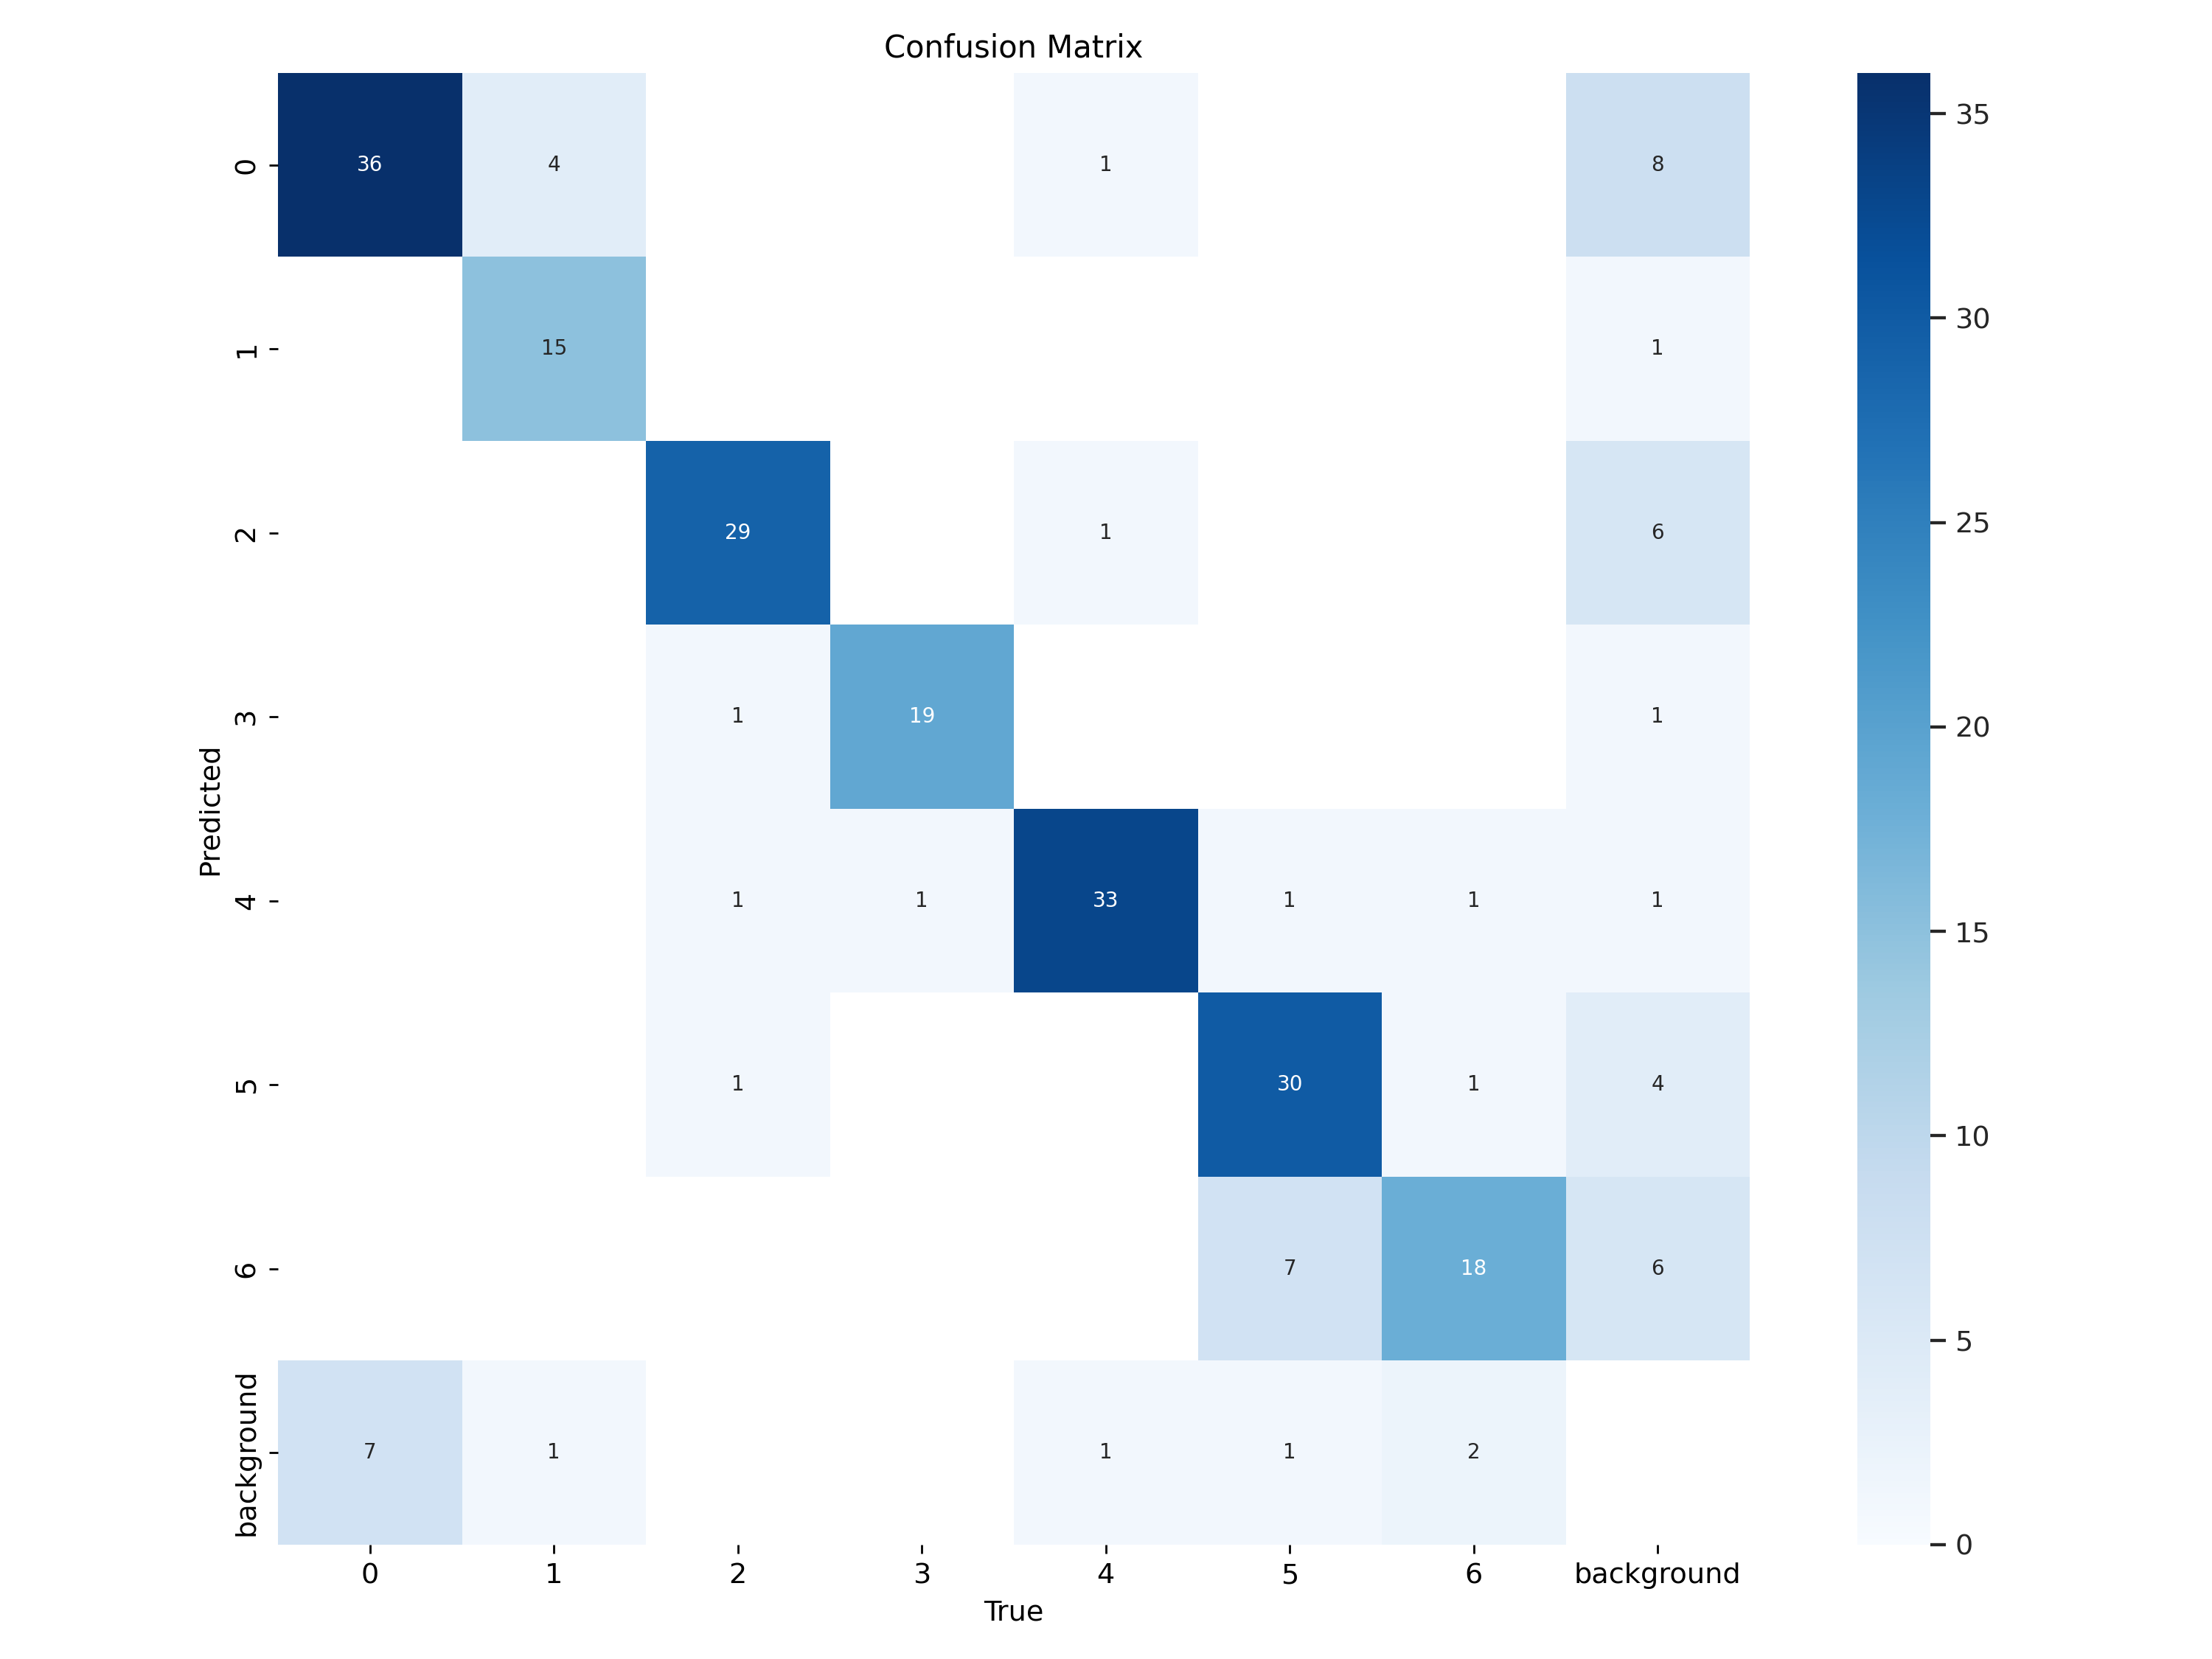

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


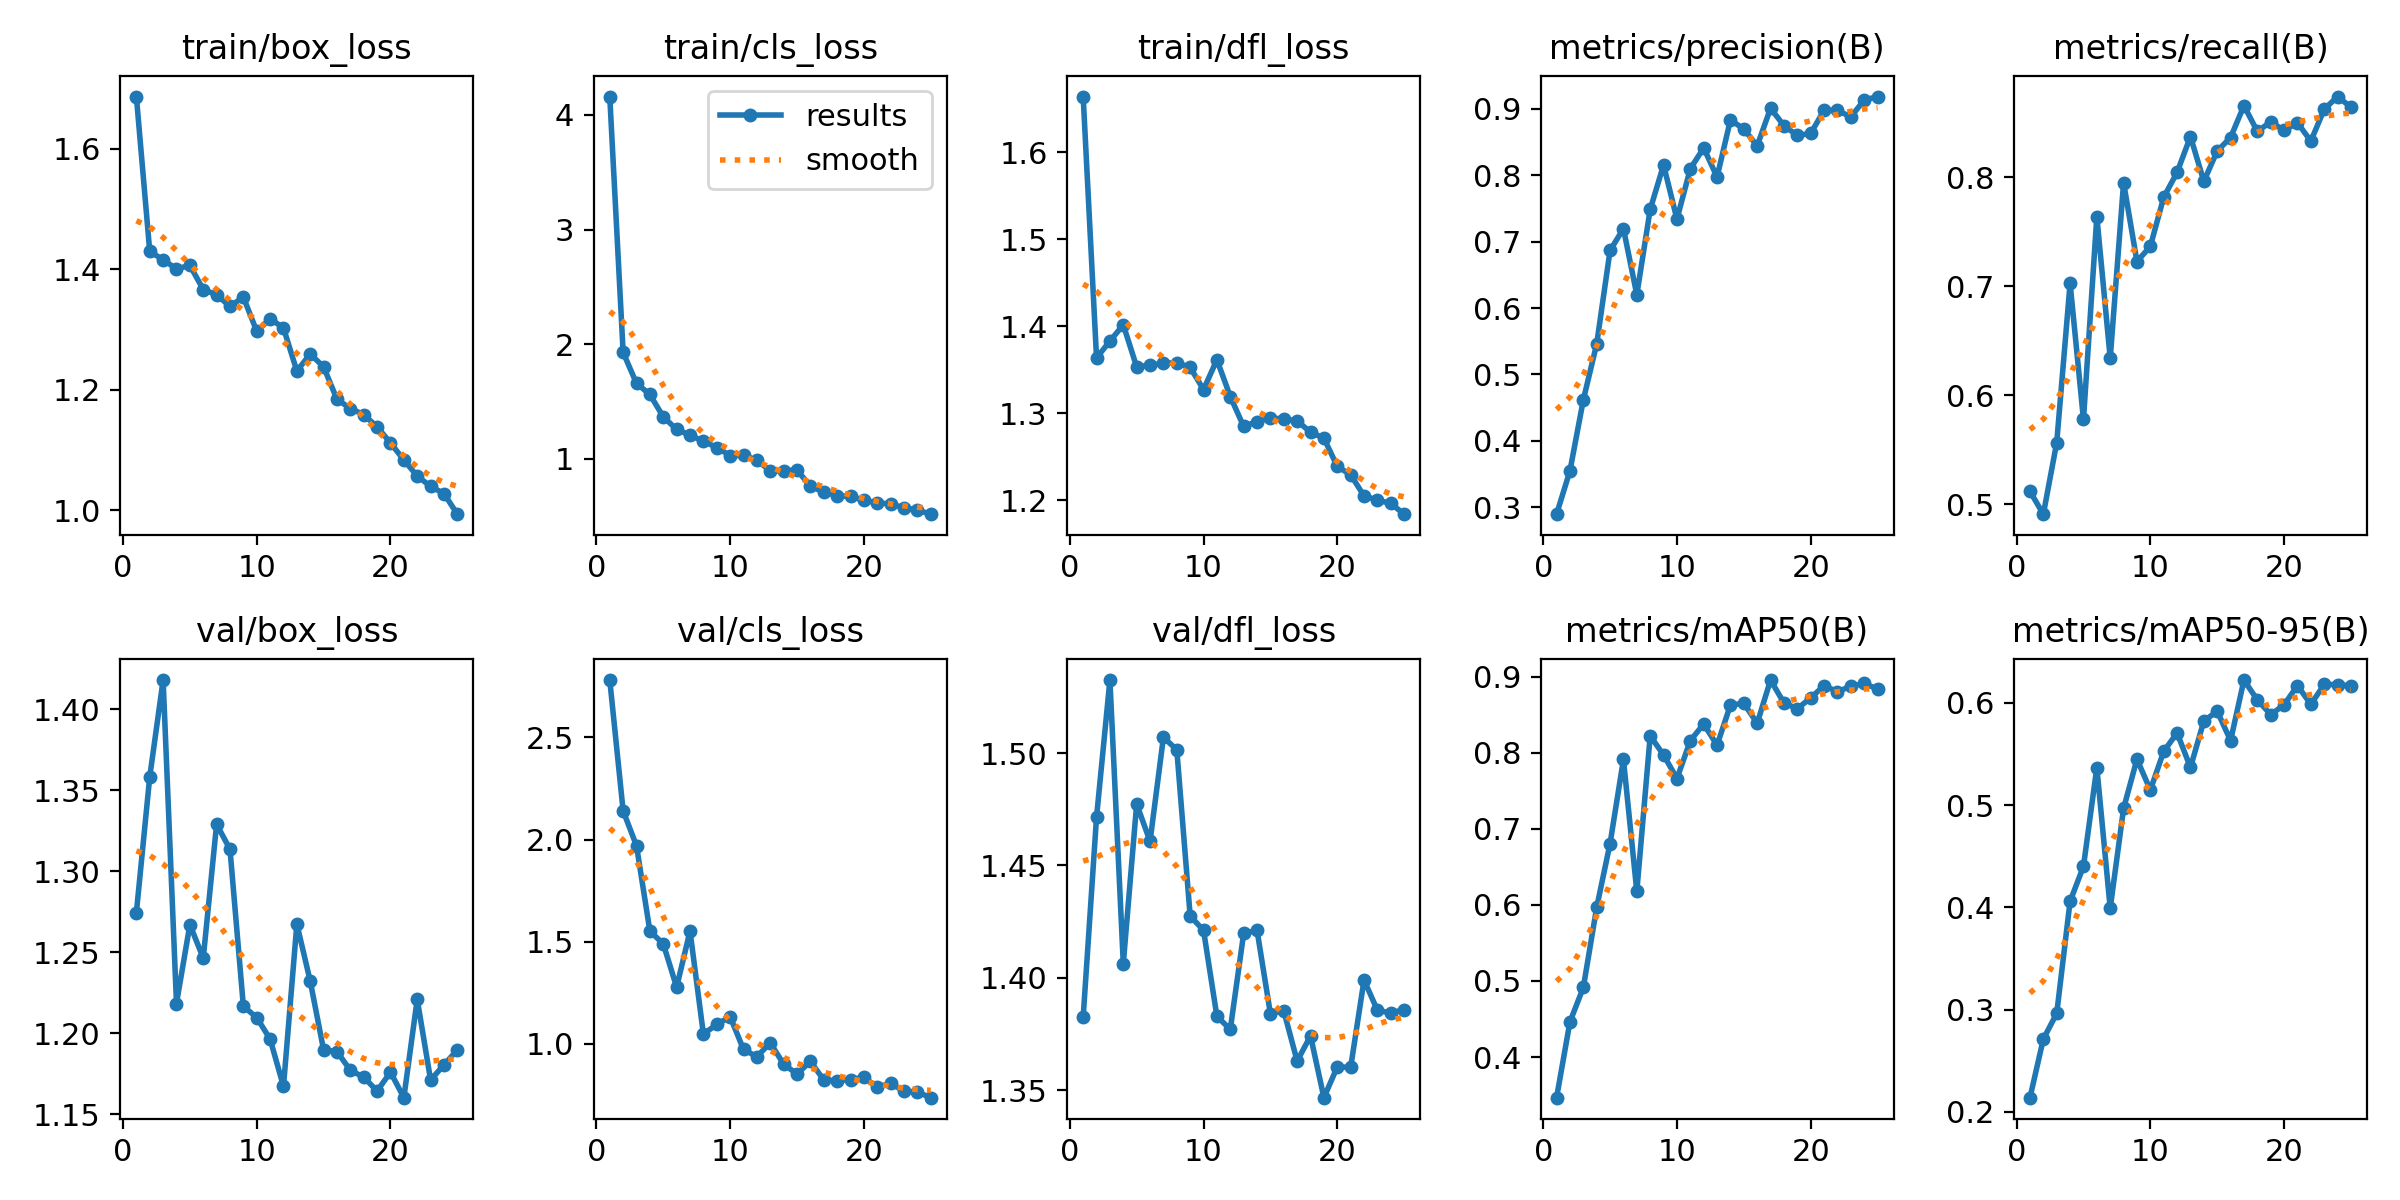

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


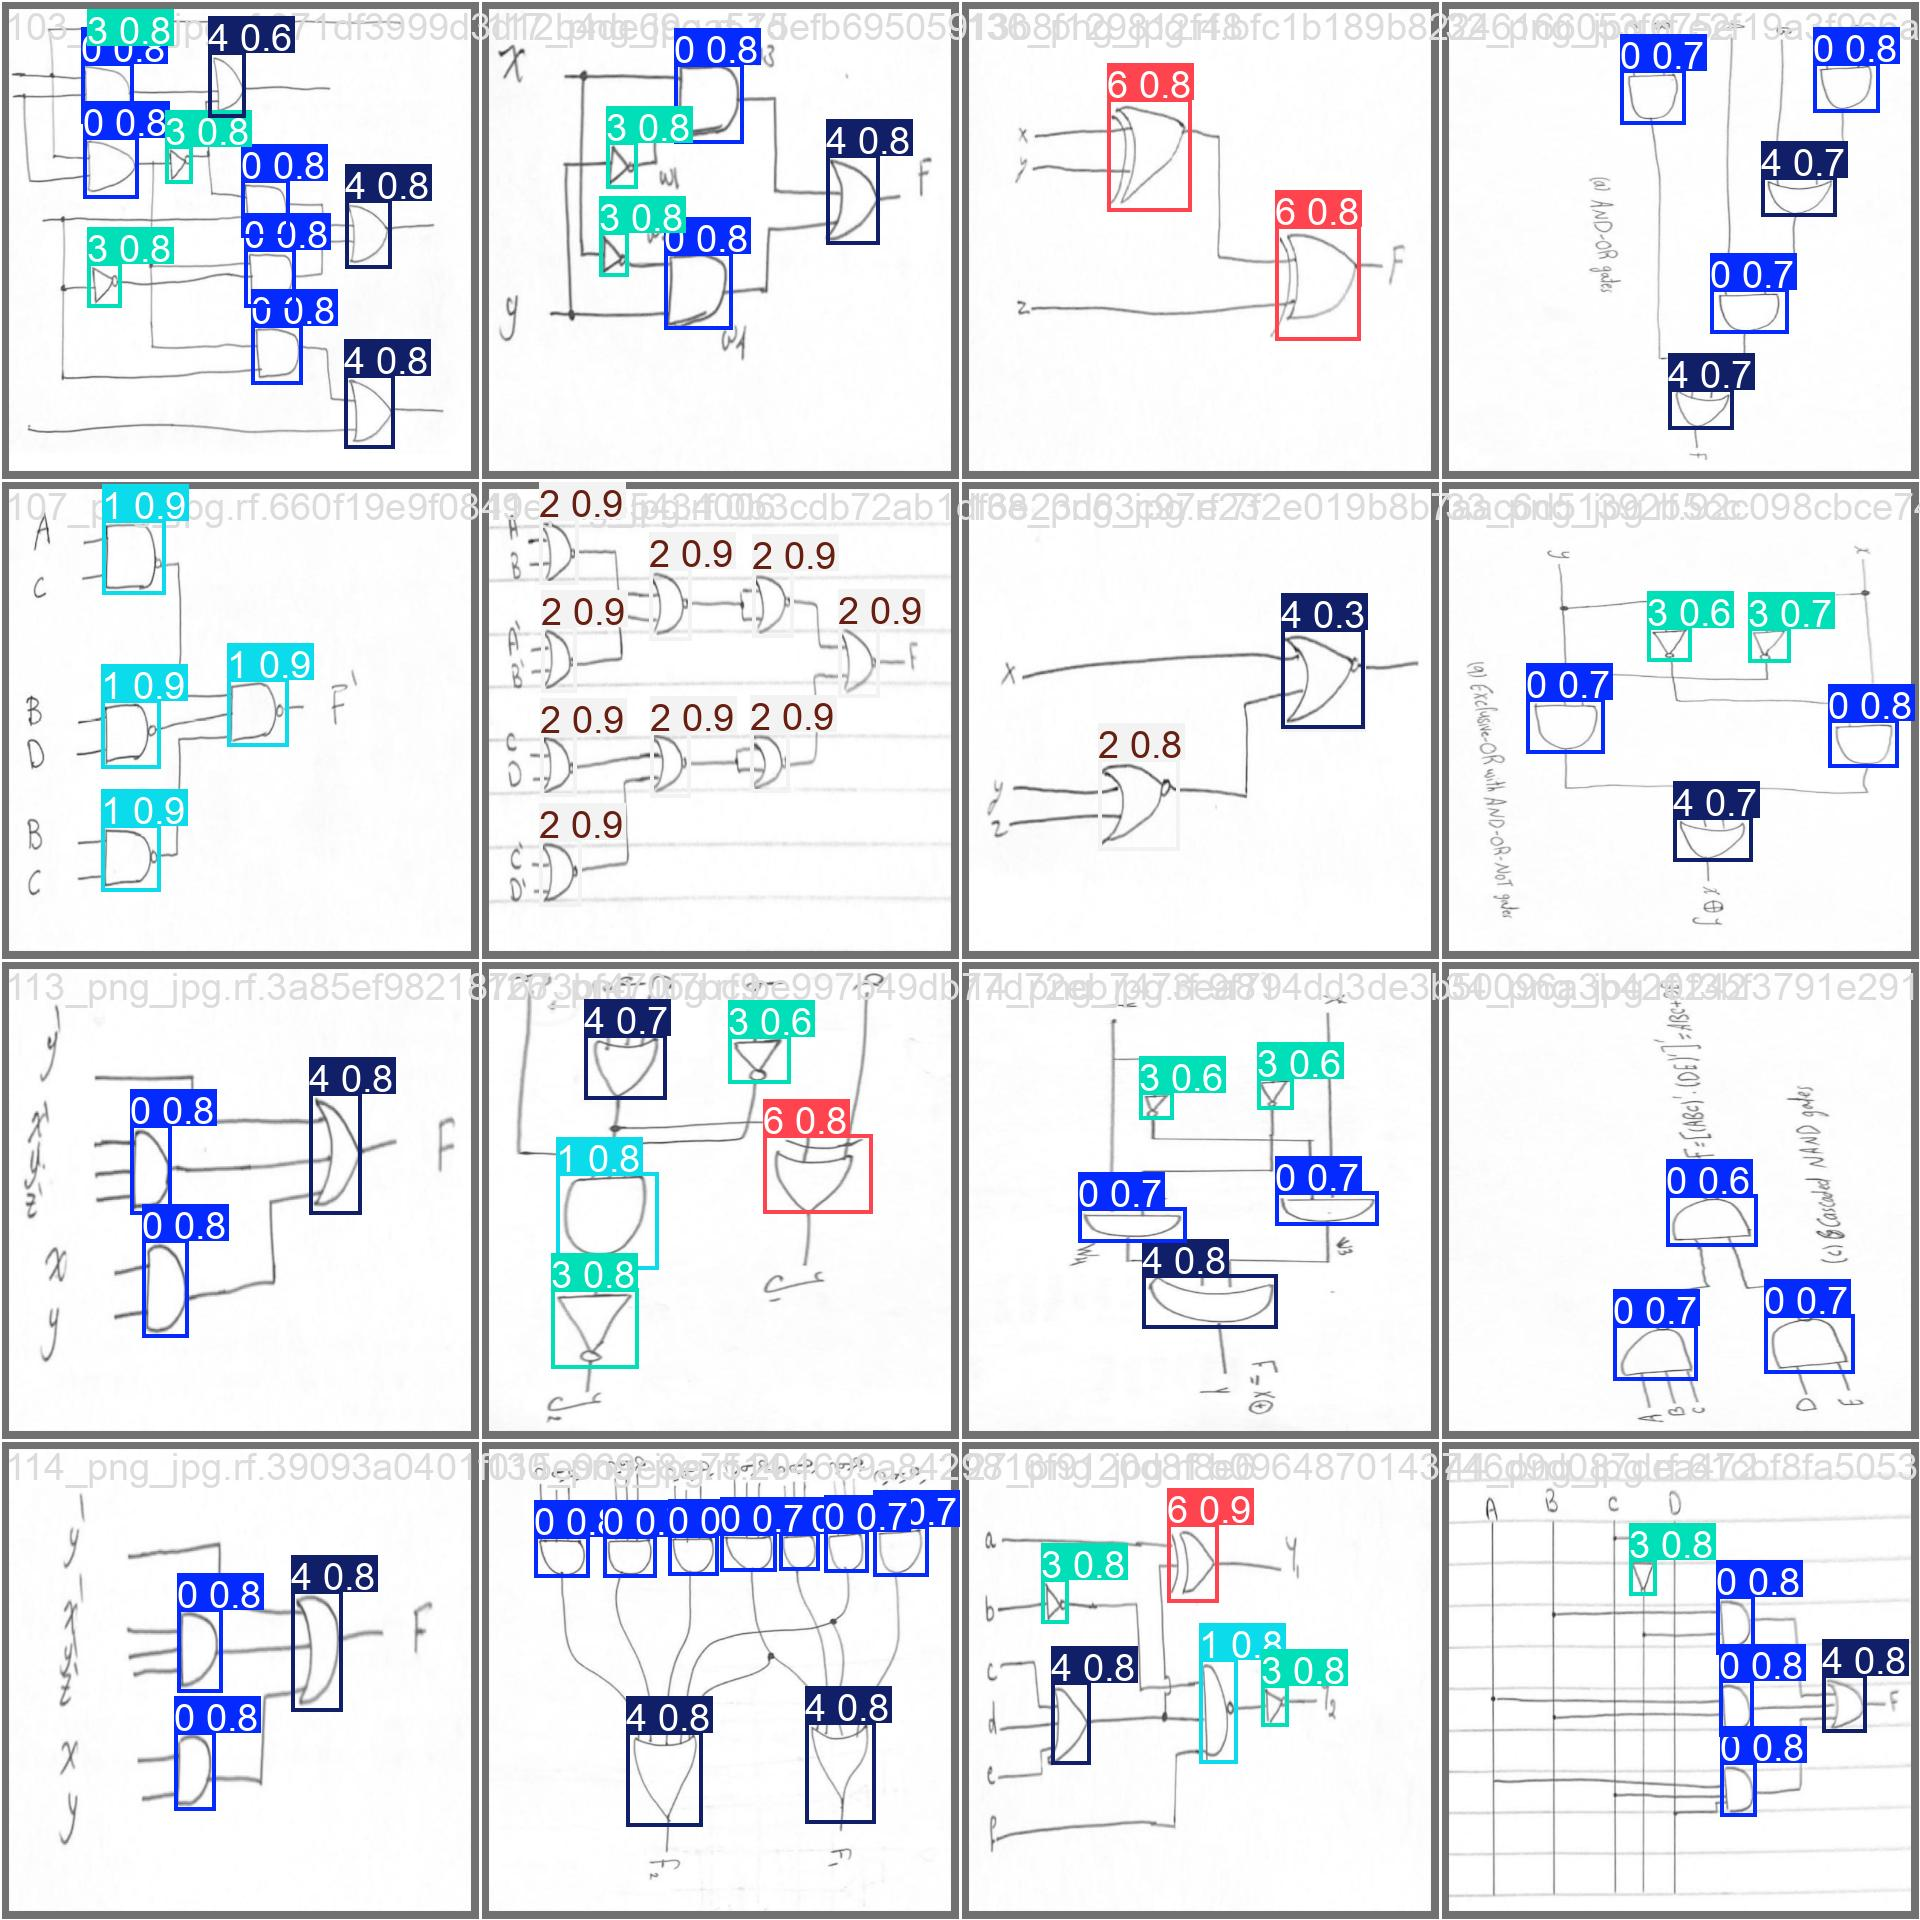

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Logic-Gate-Detection-1/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 17, len(boxes) = 212. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.34s/it]
                   all         58        212      0.901      0.865      0.896      0.623
                     0         15         43      0.752      0.837      0.787      0.543
                     1          9         20      0.971        0.8      0.885      0.689
                

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/30 /content/datasets/Logic-Gate-Detection-1/test/images/109_png_jpg.rf.95609104e0037b3f6006be45c797afa4.jpg: 800x800 9 2s, 22.9ms
image 2/30 /content/datasets/Logic-Gate-Detection-1/test/images/123_png_jpg.rf.0c8c6a296b9dce9d55c0d7f1d5641ad5.jpg: 800x800 3 0s, 1 4, 22.9ms
image 3/30 /content/datasets/Logic-Gate-Detection-1/test/images/12_png_jpg.rf.57e46178c5fb24158cbe6d160e3d9543.jpg: 800x800 9 2s, 22.8ms
image 4/30 /content/datasets/Logic-Gate-Detection-1/test/images/1_png_jpg.rf.600f38b81eaa033bd34360984967a545.jpg: 800x800 2 0s, 2 4s, 2 6s, 22.8ms
image 5/30 /content/datasets/Logic-Gate-Detection-1/test/images/30_png_jpg.rf.8148456898cdef0d30da2b7b7ca27b0f.jpg: 800x800 1 0, 2 4s, 22.8ms
image 6/30 /content/datasets/Logic-Gate-Detection-1/test/images/45_png_jpg.rf.1ffa6188f5ffdc04dddf8f46862289be.

**NOTE:** Let's take a look at few results.

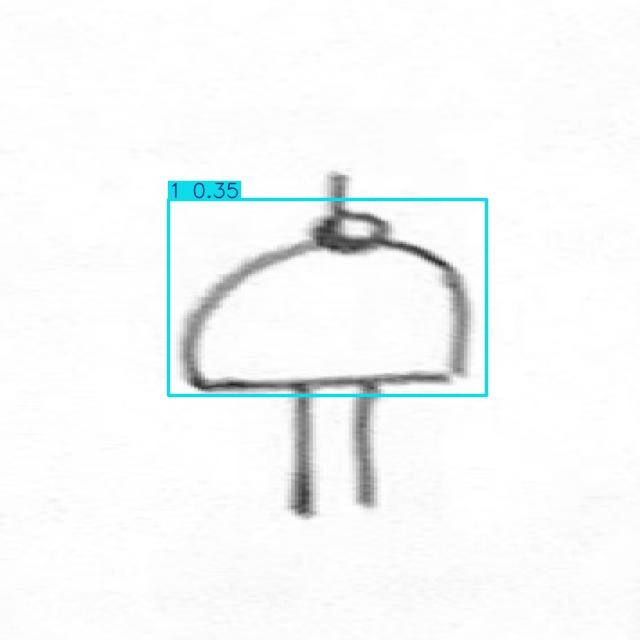

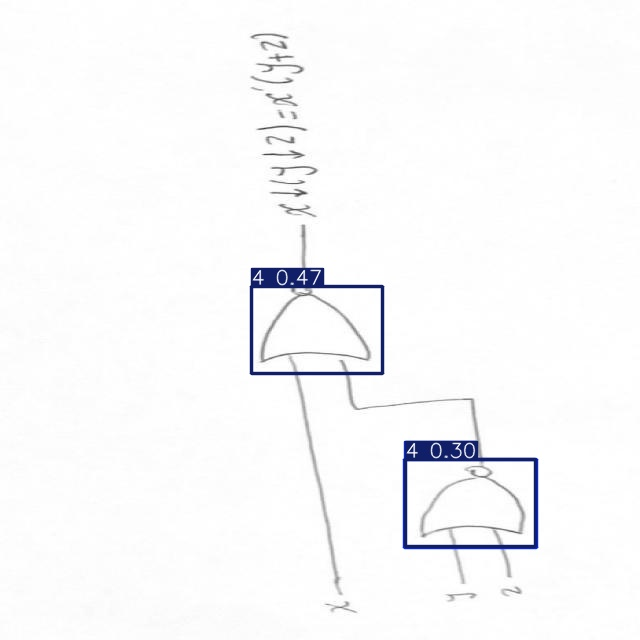

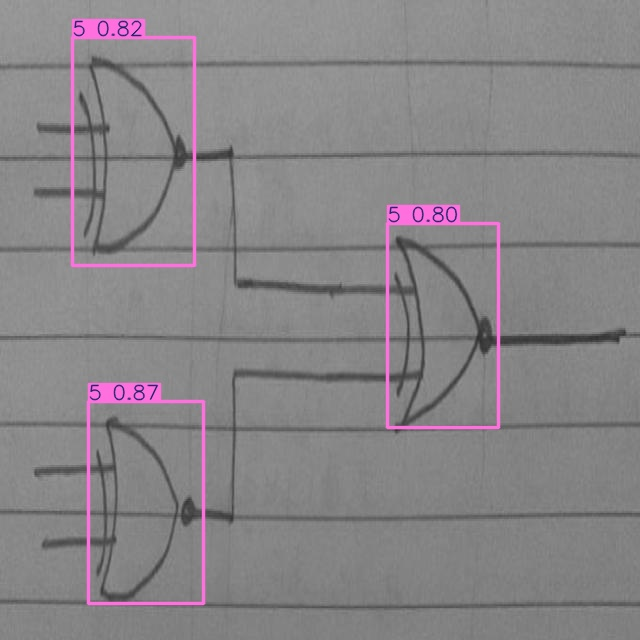

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

(592, 528, 3)
(528, 592, 3)


array([[[253, 253, 253],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [253, 253, 253]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]], dtype=uint8)
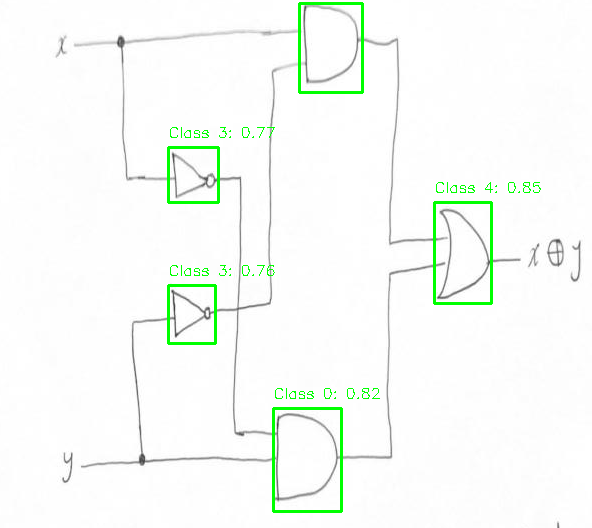

In [ ]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random

import cv2
import json

# Load the image
image_path = '/content/test.png'  # Path of the test image
image = cv2.imread(image_path)

print(image.shape)
pred = model.predict('/content/test.png', confidence=40, overlap=30).json()

for gate in pred['predictions']:
    x_center = gate['x']
    y_center = gate['y']
    width = gate['width']
    height = gate['height']

    # Calculate the top-left corner of the bounding box
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)

    # Draw the bounding box
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Green box with thickness 2

    # Put the class label and confidence score
    label = f"Class {gate['class']}: {gate['confidence']:.2f}"
    cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Save the image with bounding boxes
output_image_path = 'test_image_with_bboxes.png'
cv2.imwrite(output_image_path, image)
cv2.imread(output_image_path)